In [72]:
# Import packages
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt

In [73]:
ga_2023_gdf = gpd.read_file("congress-2023-shape/Congress-2023-shape.shp")
ga_2021_gdf = gpd.read_file("congress-prop1-2021-shape/CONGRESS-PROP1-2021-shape.shp")

<Axes: >

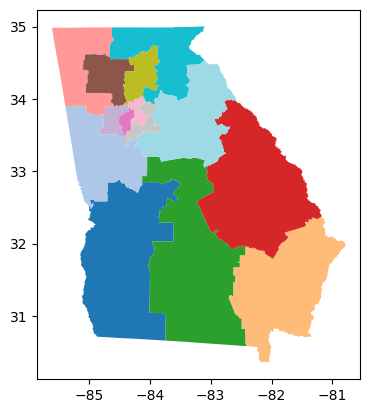

In [74]:
ga_2023_gdf.plot(cmap = "tab20")

<Axes: >

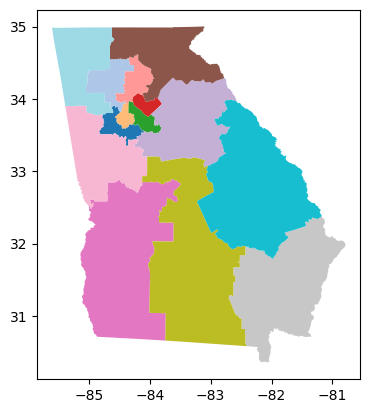

In [75]:
ga_2021_gdf.plot(cmap = "tab20")

In [76]:
# Import 2022 General Election voting data
ga_data_gdf = gpd.read_file('ga_2022_gen_prec/ga_2022_gen_st_prec/ga_2022_gen_st_prec.shp')
ga_data_gdf.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'county', 'precinct', 'G22A01NO', 'G22A01YES',
       'G22A02NO', 'G22A02YES', 'G22AGRDHEM', 'G22AGRLRAU', 'G22AGRRHAR',
       'G22ATGDJOR', 'G22ATGLCOW', 'G22ATGRCAR', 'G22GOVDABR', 'G22GOVLHAZ',
       'G22GOVRKEM', 'G22INSDROB', 'G22INSRKIN', 'G22LABDBOD', 'G22LABLAND',
       'G22LABRTHO', 'G22LTGDBAI', 'G22LTGLGRA', 'G22LTGRJON', 'G22RFANO',
       'G22RFAYES', 'G22RFBNO', 'G22RFBYES', 'G22SOSDNGU', 'G22SOSLMET',
       'G22SOSRRAF', 'G22SUPDSEA', 'G22SUPRWOO', 'G22USSDWAR', 'G22USSLOLI',
       'G22USSRWAL', 'geometry'],
      dtype='object')

In [77]:
# List of specific columns to keep
columns_to_keep = ['UNIQUE_ID', 'COUNTYFP', 'county', 'precinct', 'geometry']

# Add columns starting with 'G22USS'
filtered_columns = columns_to_keep + [col for col in ga_data_gdf.columns if col.startswith('G22USS')]

# Filter the GeoDataFrame
ga_data_gdf = ga_data_gdf[filtered_columns]

In [78]:
ga_data_gdf.columns

Index(['UNIQUE_ID', 'COUNTYFP', 'county', 'precinct', 'geometry', 'G22USSDWAR',
       'G22USSLOLI', 'G22USSRWAL'],
      dtype='object')

In [79]:
ga_data_gdf.head()

,UNIQUE_ID,COUNTYFP,county,precinct,geometry,G22USSDWAR,G22USSLOLI,G22USSRWAL
0,001-1B,1,Appling,1B,"POLYGON ((-82.37653 31.83940, -82.37665 31.839...",86,15,721
1,001-1C,1,Appling,1C,"POLYGON ((-82.49759 31.81825, -82.49872 31.818...",51,6,571
2,001-2,1,Appling,2,"POLYGON ((-82.35743 31.78134, -82.35859 31.781...",641,11,393
3,001-3A1,1,Appling,3A1,"POLYGON ((-82.19971 31.83475, -82.20023 31.834...",23,8,493
4,001-3C,1,Appling,3C,"POLYGON ((-82.30075 31.67965, -82.30342 31.683...",213,5,726


Need to add district to this so we are going to left join with data from general election congressional precinct data but only add the district column.

In [80]:
ga_data_cong_gdf = gpd.read_file('ga_2022_gen_prec/ga_2022_gen_cong_prec/ga_2022_gen_cong_prec.shp')
ga_data_cong_gdf.head()

,UNIQUE_ID,COUNTYFP,county,precinct,CONG_DIST,GCON01DHER,GCON01RCAR,GCON02DBIS,GCON02RWES,GCON03DALM,...,GCON10RCOL,GCON11DDAZ,GCON11RLOU,GCON12DJOH,GCON12RALL,GCON13DSCO,GCON13RGON,GCON14DFLO,GCON14RGRE,geometry
0,021-VINEVILLE 6-(CONG-02),21,Bibb,Vineville 6,02,0,0,433,305,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-83.66243 32.85187, -83.66242 32.851..."
1,215-CHATTAHOOCHEE-(CONG-02),215,Muscogee,Chattahoochee,02,0,0,1409,1976,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-84.96698 32.54237, -84.96701 32.542..."
2,215-COLUMBUS TECH-(CONG-02),215,Muscogee,Columbus Tech,02,0,0,607,500,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-84.97207 32.50868, -84.97223 32.508..."
3,215-ST PAUL-(CONG-02),215,Muscogee,St Paul,02,0,0,1186,1553,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-84.94815 32.47774, -84.94831 32.477..."
4,021-VINEVILLE 6-(CONG-08),21,Bibb,Vineville 6,08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-83.68905 32.86310, -83.68918 32.863..."


In [81]:
ga_data_gdf = ga_data_gdf.merge(ga_data_cong_gdf[["county", "precinct", "CONG_DIST"]], on=['county', 'precinct'], how='left')
ga_data_gdf['CONG_DIST'] = ga_data_gdf['CONG_DIST'].astype(str).str.lstrip('0')

In [82]:
ga_data_gdf.head()

,UNIQUE_ID,COUNTYFP,county,precinct,geometry,G22USSDWAR,G22USSLOLI,G22USSRWAL,CONG_DIST
0,001-1B,1,Appling,1B,"POLYGON ((-82.37653 31.83940, -82.37665 31.839...",86,15,721,1
1,001-1C,1,Appling,1C,"POLYGON ((-82.49759 31.81825, -82.49872 31.818...",51,6,571,1
2,001-2,1,Appling,2,"POLYGON ((-82.35743 31.78134, -82.35859 31.781...",641,11,393,1
3,001-3A1,1,Appling,3A1,"POLYGON ((-82.19971 31.83475, -82.20023 31.834...",23,8,493,1
4,001-3C,1,Appling,3C,"POLYGON ((-82.30075 31.67965, -82.30342 31.683...",213,5,726,1


Add voting data to shapefiles

In [96]:
ga_2023_gdf['DISTRICT'] = ga_2023_gdf['DISTRICT'].astype(str).str.lstrip('0')
ga_2021_gdf['DISTRICT'] = ga_2021_gdf['DISTRICT'].astype(str).str.lstrip('0')

In [91]:
ga_2023_gdf = ga_2023_gdf.merge(ga_data_gdf, left_on='DISTRICT', right_on='CONG_DIST', how='inner')

In [92]:
ga_2023_gdf.head()

,ID,AREA,DATA,DISTRICT,POPULATION,F18_POP,NH_WHT,NH_BLK,HISPANIC_O,NH_ASN,...,geometry_x,UNIQUE_ID,COUNTYFP,county,precinct,geometry_y,G22USSDWAR,G22USSLOLI,G22USSRWAL,CONG_DIST
0,1,10127.426758,2,2,765137,587555,305611,375124,45499,10263,...,"POLYGON ((-84.69460 32.58394, -84.69460 32.584...",007-ANNA,7,Baker,Anna,"POLYGON ((-84.55670 31.25670, -84.55702 31.256...",141,2,140,2
1,1,10127.426758,2,2,765137,587555,305611,375124,45499,10263,...,"POLYGON ((-84.69460 32.58394, -84.69460 32.584...",007-ELMODEL,7,Baker,Elmodel,"POLYGON ((-84.50016 31.35413, -84.50062 31.354...",56,0,137,2
2,1,10127.426758,2,2,765137,587555,305611,375124,45499,10263,...,"POLYGON ((-84.69460 32.58394, -84.69460 32.584...",007-HOGGARDS MILL,7,Baker,Hoggards Mill,"POLYGON ((-84.43983 31.26311, -84.44028 31.263...",151,6,104,2
3,1,10127.426758,2,2,765137,587555,305611,375124,45499,10263,...,"POLYGON ((-84.69460 32.58394, -84.69460 32.584...",007-MILFORD,7,Baker,Milford,"POLYGON ((-84.51433 31.41154, -84.51449 31.411...",76,3,198,2
4,1,10127.426758,2,2,765137,587555,305611,375124,45499,10263,...,"POLYGON ((-84.69460 32.58394, -84.69460 32.584...",007-NEWTON,7,Baker,Newton,"MULTIPOLYGON (((-84.41989 31.28521, -84.41932 ...",102,1,132,2


In [94]:
ga_2023_gdf[pd.isna(ga_2023_gdf['CONG_DIST'])]

,ID,AREA,DATA,DISTRICT,POPULATION,F18_POP,NH_WHT,NH_BLK,HISPANIC_O,NH_ASN,...,geometry_x,UNIQUE_ID,COUNTYFP,county,precinct,geometry_y,G22USSDWAR,G22USSLOLI,G22USSRWAL,CONG_DIST


In [97]:
ga_2021_gdf = ga_2021_gdf.merge(ga_data_gdf, left_on='DISTRICT', right_on='CONG_DIST', how='inner')

In [98]:
ga_2021_gdf[pd.isna(ga_2021_gdf['CONG_DIST'])]

,ID,AREA,DATA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,F18_POP,NH_WHT,...,geometry_x,UNIQUE_ID,COUNTYFP,county,precinct,geometry_y,G22USSDWAR,G22USSLOLI,G22USSRWAL,CONG_DIST


In [99]:
ga_2021_gdf.head()

,ID,AREA,DATA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,F18_POP,NH_WHT,...,geometry_x,UNIQUE_ID,COUNTYFP,county,precinct,geometry_y,G22USSDWAR,G22USSLOLI,G22USSRWAL,CONG_DIST
0,1,599.114258,5,13,1.0,None,None,765137,574789,125106,...,"POLYGON ((-84.49513 33.80854, -84.49533 33.808...",063-ELLENWOOD 1,63,Clayton,Ellenwood 1,"POLYGON ((-84.26294 33.61143, -84.26295 33.610...",1599,12,84,13
1,1,599.114258,5,13,1.0,None,None,765137,574789,125106,...,"POLYGON ((-84.49513 33.80854, -84.49533 33.808...",063-ELLENWOOD 2,63,Clayton,Ellenwood 2,"POLYGON ((-84.30413 33.63318, -84.30498 33.634...",1825,11,110,13
2,1,599.114258,5,13,1.0,None,None,765137,574789,125106,...,"POLYGON ((-84.49513 33.80854, -84.49533 33.808...",063-FOREST PARK 4,63,Clayton,Forest Park 4,"POLYGON ((-84.34962 33.61572, -84.34952 33.615...",476,12,209,13
3,1,599.114258,5,13,1.0,None,None,765137,574789,125106,...,"POLYGON ((-84.49513 33.80854, -84.49533 33.808...",063-FOREST PARK 5,63,Clayton,Forest Park 5,"POLYGON ((-84.36407 33.60370, -84.36409 33.603...",1004,20,197,13
4,1,599.114258,5,13,1.0,None,None,765137,574789,125106,...,"POLYGON ((-84.49513 33.80854, -84.49533 33.808...",063-FOREST PARK 6,63,Clayton,Forest Park 6,"POLYGON ((-84.36546 33.59456, -84.36453 33.594...",434,9,169,13
